# Iris flower classification


dataset used IRIS.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
dataset=pd.read_csv('IRIS.csv ')
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.describe( ) 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.shape

(150, 5)

In [6]:
labels=dataset.species.unique()

In [7]:
versicolor=dataset[dataset.species=='Iris-versicolor']

In [8]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [9]:
virginica=dataset[dataset.species=='Iris-virginica']

In [10]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [11]:
setosa=dataset[dataset.species=='Iris-setosa']

In [12]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [13]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

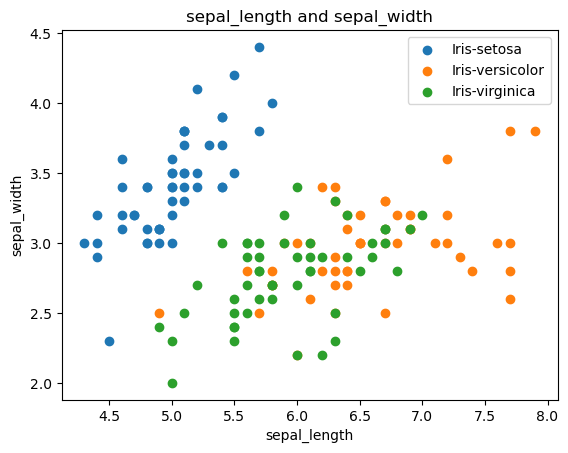

In [14]:
plt.title('sepal_length and sepal_width')
plt.scatter(setosa.sepal_length,setosa.sepal_width)
plt.scatter(virginica.sepal_length,virginica.sepal_width)
plt.scatter(versicolor.sepal_length,versicolor.sepal_width)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(labels)

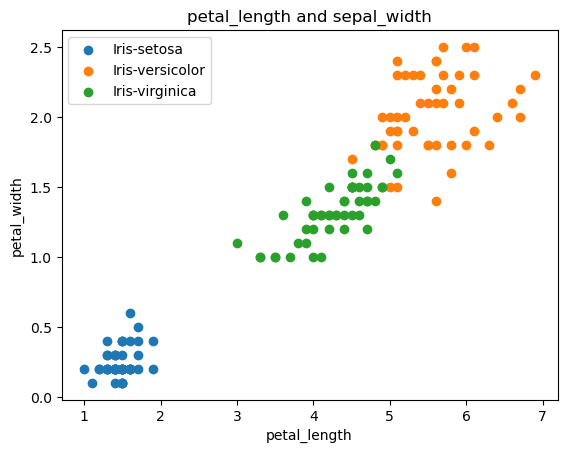

In [15]:
plt.title('petal_length and sepal_width')
plt.scatter(setosa.petal_length,setosa.petal_width)
plt.scatter(virginica.petal_length,virginica.petal_width)
plt.scatter(versicolor.petal_length,versicolor.petal_width)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(labels)

In [16]:
x=dataset.drop(['species'],axis=1)

In [17]:
x.shape 

(150, 4)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [19]:
y=dataset.species

In [20]:
y_num=le.fit_transform(y)

In [21]:
len(y_num)

150

In [22]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_num,test_size=0.2)

In [24]:
len(x_train) 


120

In [25]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [26]:
model.score(x_test,y_test)

0.9666666666666667

In [29]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 0, 2, 2, 0, 1, 2])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  5]], dtype=int64)

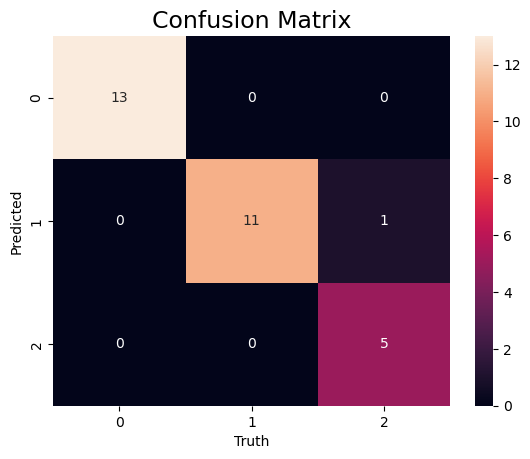

In [46]:
import seaborn as sb
sb.heatmap(cm,annot=True)
plt.ylabel('Predicted')
plt.xlabel('Truth')
plt.title('Confusion Matrix',fontsize=17)
plt.show()